In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Зчитуємо дані з вказаної таблиці за допомогою read_html
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]

In [3]:
# Виводимо перші рядки таблиці
print("Перші рядки таблиці:")
print(df.head())

Перші рядки таблиці:
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [4]:
# Визначаємо кількість рядків та стовпців у датафреймі
rows, columns = df.shape
print("\nКількість рядків та стовпців:", rows, columns)


Кількість рядків та стовпців: 28 9


In [5]:
# Замінюємо у таблиці значення "—" на значення NaN
df.replace("—", pd.NA, inplace=True)

In [6]:
# Визначаємо типи всіх стовпців
print("\nТипи стовпців:")
print(df.dtypes)


Типи стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [7]:
# Замінюємо типи нечислових колонок на числові
column_types = df.drop(columns=["Регіон"]).dtypes
non_numeric_columns = column_types[column_types == object].index
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors="coerce")

In [8]:
# Пораховуємо частку пропусків в кожній колонці
missing_percentage = df.isnull().sum() / len(df)  
print("\nЧастка пропусків в кожній колонці:")
print(missing_percentage)


Частка пропусків в кожній колонці:
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [9]:
# Видаляємо останній рядок
df = df.iloc[:-1]
rows_after_deletion, _ = df.shape
print("\nКількість рядків після видалення останнього рядка:", rows_after_deletion)


Кількість рядків після видалення останнього рядка: 27


In [10]:
# Замінюємо відсутні дані в стовпцях, окрім "Регіон", середніми значеннями
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df.fillna(df.iloc[:, 1:].mean(), inplace=True)

In [11]:
# Отримуємо список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
regions_above_average = df.loc[df["2019"] > df["2019"].mean(), ["Регіон", "2019"]]
print("\nРегіони з вищим рівнем народжуваності у 2019 році за середнім по Україні:")
print(regions_above_average)


Регіони з вищим рівнем народжуваності у 2019 році за середнім по Україні:
               Регіон  2019
2           Волинська  10.1
6        Закарпатська  10.4
8   Івано-Франківська   8.8
12          Львівська   8.7
14            Одеська   8.8
16         Рівненська  10.7
20         Херсонська   8.1
23        Чернівецька   9.2
25               Київ  11.0


In [12]:
# Знаходимо регіон з найвищим рівнем народжуваності у 2014 році
highest_birth_rate_region_2014 = df.loc[df["2014"].idxmax()]["Регіон"]
print("\nРегіон з найвищим рівнем народжуваності у 2014 році:", highest_birth_rate_region_2014)


Регіон з найвищим рівнем народжуваності у 2014 році: Рівненська


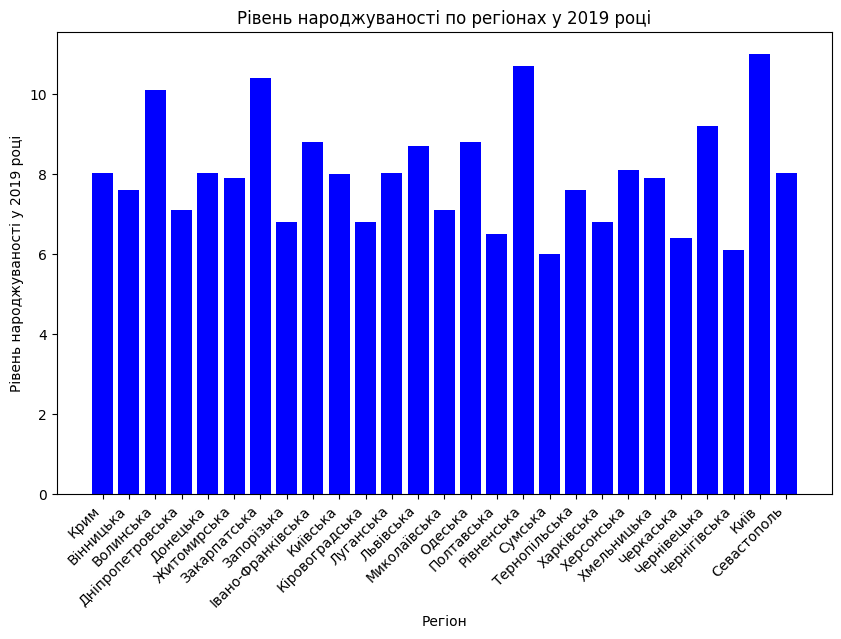

In [13]:
# Побудова стовпчикової діаграми народжуваності по регіонах у 2019 році
plt.figure(figsize=(10, 6))
plt.bar(df["Регіон"], df["2019"], color='blue')
plt.xlabel("Регіон")
plt.ylabel("Рівень народжуваності у 2019 році")
plt.title("Рівень народжуваності по регіонах у 2019 році")
plt.xticks(rotation=45, ha='right')
plt.show()